# Prediksi Jarak Tempuh Menggunakan Machine Learning

In [1]:
#Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from functools import reduce
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

def combineData(folder_path, data_type):
    """
    folder_path = folder directory 
    data_type = data_jangkar, data_jarak, etc (depend on the folder availability)
    """
    file_path = folder_path + data_type 
    df_all = pd.DataFrame()
    for filename in os.listdir(file_path):
        fn = os.path.join(file_path,filename)
        #get all data 
        df =  pd.read_excel(fn, sheet_name=1)
        df_all = df_all.append(df)
    df_all.reset_index(inplace=True, drop=True)
    return df_all

folder_path = r"D:\folder\kuliah\Machine Learning Kapal\KM Dorolonda\\"  # ganti path name-nya

df_jangkar = combineData(folder_path, 'data_jangkar')
df_jarak = combineData(folder_path, 'data_jarak')
df_kecepatan = combineData(folder_path, 'data_kecepatan')
df_waktu = combineData(folder_path, 'data_waktu')
df_tracking = pd.read_excel(folder_path+'5_tracking.xlsx')

dfs = [df_jangkar, df_jarak, df_kecepatan, df_waktu]

for df in dfs:
    df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%Y-%m-%d').dt.floor("D")
    df.set_index('Tanggal', inplace=True)

In [2]:
#merge all DataFrames into one
df_final = reduce(lambda  left,right: pd.merge(left,right,
                                            how='left',left_index=True,right_index=True ), dfs)
df_final.replace(0, np.nan, inplace=True)
df_final = df_final.dropna(how='any',axis=0) # drop row with null value
df_final.loc[df_final['Jarak Tempuh (mile)'] > 200000] # drop outlier
df_final

,Waktu Jangkar (menit),Jarak Tempuh (mile),Kecepatan (knot/jam),Waktu Berlayar (menit)
Tanggal,,,,
2018-08-08,90,410.539820,14.86,1350.0
2018-08-09,270,345.792961,12.52,1170.0
2018-08-14,120,1033.091425,18.90,495.0
2018-08-15,75,442.602563,16.02,1365.0
2018-08-16,90,159.133113,11.77,615.0
...,...,...,...,...
2022-04-14,795,376.799374,13.68,645.0
2022-04-15,555,405.879537,14.75,885.0
2022-04-16,180,500.887163,18.19,1245.0


### Statistik Data

In [3]:
df_final.describe()

,Waktu Jangkar (menit),Jarak Tempuh (mile),Kecepatan (knot/jam),Waktu Berlayar (menit)
count,1260.000000,1260.000000,1260.000000,1260.000000
mean,517.000000,913.300022,12.557786,853.321429
std,338.820913,19495.405218,5.060711,348.384191
min,15.000000,0.124274,-0.840000,15.000000
25%,270.000000,261.100094,9.927500,615.000000
50%,435.000000,386.648105,14.025000,930.000000
75%,705.000000,453.942584,16.460000,1125.000000
max,1440.000000,692267.069890,18.900000,1440.000000


In [4]:
# remove outlier 
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df
cols = ['Waktu Jangkar (menit)', 'Jarak Tempuh (mile)', 'Kecepatan (knot/jam)', 'Waktu Berlayar (menit)']
df_final = remove_outliers(df_final, cols, 3)
df_final

Working on column: Waktu Jangkar (menit)
Working on column: Jarak Tempuh (mile)
Working on column: Kecepatan (knot/jam)
Working on column: Waktu Berlayar (menit)


,Waktu Jangkar (menit),Jarak Tempuh (mile),Kecepatan (knot/jam),Waktu Berlayar (menit)
Tanggal,,,,
2018-08-08,90,410.539820,14.86,1350.0
2018-08-09,270,345.792961,12.52,1170.0
2018-08-14,120,1033.091425,18.90,495.0
2018-08-15,75,442.602563,16.02,1365.0
2018-08-16,90,159.133113,11.77,615.0
...,...,...,...,...
2022-04-14,795,376.799374,13.68,645.0
2022-04-15,555,405.879537,14.75,885.0
2022-04-16,180,500.887163,18.19,1245.0


In [5]:
df_final.describe()

,Waktu Jangkar (menit),Jarak Tempuh (mile),Kecepatan (knot/jam),Waktu Berlayar (menit)
count,1259.000000,1259.000000,1259.000000,1259.000000
mean,517.398729,364.170737,12.552748,852.855441
std,338.659691,356.063165,5.059561,348.129581
min,15.000000,0.124274,-0.840000,15.000000
25%,270.000000,260.913683,9.915000,615.000000
50%,435.000000,386.617036,14.020000,930.000000
75%,705.000000,453.911516,16.455000,1125.000000
max,1440.000000,8482.211247,18.900000,1425.000000


### Histogram dari setiap variabel numerik

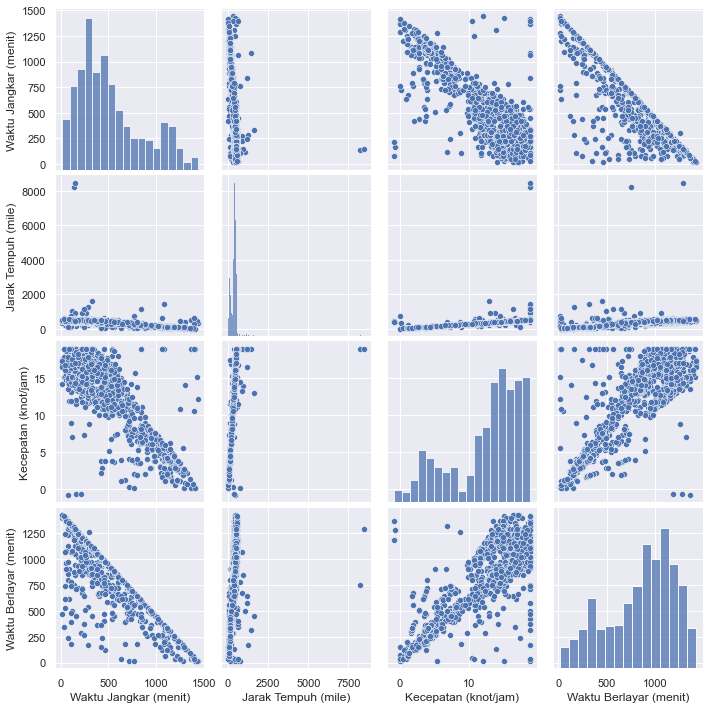

In [6]:
sns.set()
cols = ['Waktu Jangkar (menit)', 'Jarak Tempuh (mile)', 'Kecepatan (knot/jam)', 'Waktu Berlayar (menit)']
sns.pairplot(df_final[cols], height = 2.5)
plt.show()

### Cek matriks korelasi

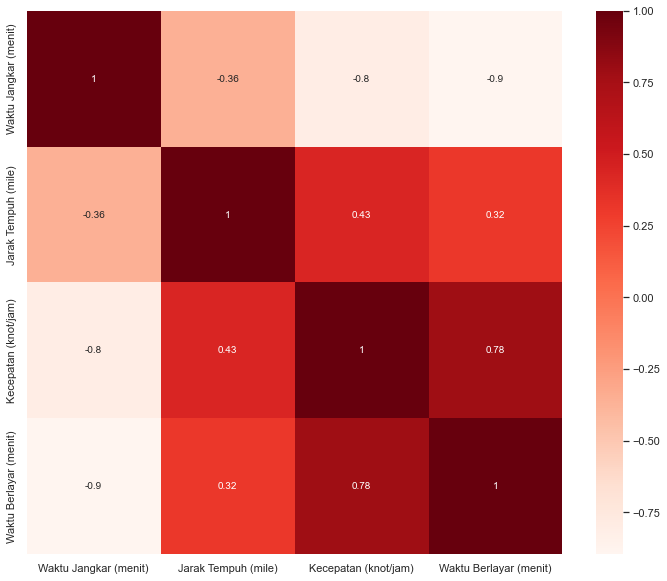

In [7]:
plt.figure(figsize=(12,10))
cor = df_final.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
corr_jarak=cor["Jarak Tempuh (mile)"].sort_values(ascending=False)
print(corr_jarak)

Jarak Tempuh (mile)       1.000000
Kecepatan (knot/jam)      0.433757
Waktu Berlayar (menit)    0.316281
Waktu Jangkar (menit)    -0.356844
Name: Jarak Tempuh (mile), dtype: float64


### Modeling dan Evaluasi

Menggunakan model multiple regression yaitu:

$$h_{\theta}(X)=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n}$$

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score

features = ['Waktu Jangkar (menit)', 'Kecepatan (knot/jam)', 'Waktu Berlayar (menit)']

train_data, test_data = train_test_split(df_final,train_size = 0.8,random_state=3)

multiple_regression = linear_model.LinearRegression()

multiple_regression.fit(train_data[features],train_data['Jarak Tempuh (mile)'])

print('Intercept: {}'.format(multiple_regression.intercept_))
print('Coefficients: {}'.format(multiple_regression.coef_))

pred = multiple_regression.predict(test_data[features])

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

pred = multiple_regression.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['Jarak Tempuh (mile)'],pred)),'.3f'))
rtecm = float(format(multiple_regression.score(test_data[features],test_data['Jarak Tempuh (mile)']),'.3f'))
artecm = float(format(adjustedR2(multiple_regression.score(test_data[features],test_data['Jarak Tempuh (mile)']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(multiple_regression,df_final[features],df_final['Jarak Tempuh (mile)'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression','selected features',rmsecm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)
# Having a R-squared value closer to one and smaller RMSE means a better fit. 

Intercept: 181.63370712596404
Coefficients: [-0.14617296 31.18791417 -0.15360507]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Multiple Regression,selected features,67.938,0.826,0.825,0.666


#### k-NN Regression 

In [10]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors=15)
knnreg.fit(train_data[features],train_data['Jarak Tempuh (mile)'])
pred = knnreg.predict(test_data[features])

rmseknn1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['Jarak Tempuh (mile)'],pred)),'.3f'))
rteknn1 = float(format(knnreg.score(test_data[features],test_data['Jarak Tempuh (mile)']),'.3f'))
arteknn1 = float(format(adjustedR2(knnreg.score(test_data[features],test_data['Jarak Tempuh (mile)']),test_data.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(knnreg,df_final[features],df_final['Jarak Tempuh (mile)'],cv=5).mean(),'.3f'))

knnreg = KNeighborsRegressor(n_neighbors=25)
knnreg.fit(train_data[features],train_data['Jarak Tempuh (mile)'])
pred = knnreg.predict(test_data[features])

rmseknn2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['Jarak Tempuh (mile)'],pred)),'.3f'))
rteknn2 = float(format(knnreg.score(test_data[features],test_data['Jarak Tempuh (mile)']),'.3f'))
arteknn2 = float(format(adjustedR2(knnreg.score(test_data[features],test_data['Jarak Tempuh (mile)']),test_data.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(knnreg,df_final[features],df_final['Jarak Tempuh (mile)'],cv=5).mean(),'.3f'))

knnreg = KNeighborsRegressor(n_neighbors=27)
knnreg.fit(train_data[features],train_data['Jarak Tempuh (mile)'])
pred = knnreg.predict(test_data[features])

rmseknn3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['Jarak Tempuh (mile)'],pred)),'.3f'))
rteknn3 = float(format(knnreg.score(test_data[features],test_data['Jarak Tempuh (mile)']),'.3f'))
arteknn3 = float(format(adjustedR2(knnreg.score(test_data[features],test_data['Jarak Tempuh (mile)']),test_data.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(knnreg,df_final[features],df_final['Jarak Tempuh (mile)'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['KNN Regression','k=15, all features',rmseknn1,rteknn1,arteknn1,cv1]
evaluation.loc[r+1] = ['KNN Regression','k=25, all features',rmseknn2,rteknn2,arteknn2,cv2]
evaluation.loc[r+2] = ['KNN Regression','k=27, all features',rmseknn3,rteknn3,arteknn3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Multiple Regression,selected features,67.938,0.826,0.825,0.666
3,KNN Regression,"k=27, all features",111.746,0.530,0.527,0.454
2,KNN Regression,"k=25, all features",112.871,0.521,0.517,0.446
1,KNN Regression,"k=15, all features",128.300,0.381,0.376,0.339


### Lasso Regression

Lasso regression is called **L1 regularization** and it is defined as

$$RSS_{LASSO} = \sum_{i=1}^{m}(h_{\theta}(x_{i})-y_{i})^{2} + \alpha \sum_{j=1}^{n}|\theta_{j}|$$

In [11]:
complex_model_L = linear_model.Lasso(alpha=1)
complex_model_L.fit(train_data[features],train_data['Jarak Tempuh (mile)'])

pred1 = complex_model_L.predict(test_data[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['Jarak Tempuh (mile)'],pred1)),'.3f'))
rtecm1 = float(format(complex_model_L.score(test_data[features],test_data['Jarak Tempuh (mile)']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_L.score(test_data[features],test_data['Jarak Tempuh (mile)']),test_data.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_L,df_final[features],df_final['Jarak Tempuh (mile)'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=100)
complex_model_L.fit(train_data[features],train_data['Jarak Tempuh (mile)'])

pred2 = complex_model_L.predict(test_data[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['Jarak Tempuh (mile)'],pred2)),'.3f'))
rtecm2 = float(format(complex_model_L.score(test_data[features],test_data['Jarak Tempuh (mile)']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_L.score(test_data[features],test_data['Jarak Tempuh (mile)']),test_data.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_L,df_final[features],df_final['Jarak Tempuh (mile)'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=1000)
complex_model_L.fit(train_data[features],train_data['Jarak Tempuh (mile)'])

pred3 = complex_model_L.predict(test_data[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['Jarak Tempuh (mile)'],pred3)),'.3f'))
rtecm3 = float(format(complex_model_L.score(test_data[features],test_data['Jarak Tempuh (mile)']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_L.score(test_data[features],test_data['Jarak Tempuh (mile)']),test_data.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_L,df_final[features],df_final['Jarak Tempuh (mile)'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression','alpha=1, all features',rmsecm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Lasso Regression','alpha=100, all features',rmsecm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Lasso Regression','alpha=1000, all features',rmsecm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Multiple Regression,selected features,67.938,0.826,0.825,0.666
4,Lasso Regression,"alpha=1, all features",67.940,0.826,0.825,0.666
5,Lasso Regression,"alpha=100, all features",76.892,0.778,0.776,0.665
6,Lasso Regression,"alpha=1000, all features",115.847,0.495,0.491,0.474
3,KNN Regression,"k=27, all features",111.746,0.530,0.527,0.454
2,KNN Regression,"k=25, all features",112.871,0.521,0.517,0.446
1,KNN Regression,"k=15, all features",128.300,0.381,0.376,0.339


### Ridge Regression
Ridge regression is called **L2 regularization** and by adding a penalty, we obtain the below equation

$$RSS_{RIDGE} = \sum_{i=1}^{m}(h_{\theta}(x_{i})-y_{i})^{2} + \alpha \sum_{j=1}^{n}\theta^{2}_{j}$$

In [12]:
complex_model_R = linear_model.Ridge(alpha=1)
complex_model_R.fit(train_data[features],train_data['Jarak Tempuh (mile)'])

pred1 = complex_model_R.predict(test_data[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['Jarak Tempuh (mile)'],pred1)),'.3f'))
rtecm1 = float(format(complex_model_R.score(test_data[features],test_data['Jarak Tempuh (mile)']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_R.score(test_data[features],test_data['Jarak Tempuh (mile)']),test_data.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_R,df_final[features],df_final['Jarak Tempuh (mile)'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=100)
complex_model_R.fit(train_data[features],train_data['Jarak Tempuh (mile)'])

pred2 = complex_model_R.predict(test_data[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['Jarak Tempuh (mile)'],pred2)),'.3f'))
rtecm2 = float(format(complex_model_R.score(test_data[features],test_data['Jarak Tempuh (mile)']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_R.score(test_data[features],test_data['Jarak Tempuh (mile)']),test_data.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_R,df_final[features],df_final['Jarak Tempuh (mile)'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=1000)
complex_model_R.fit(train_data[features],train_data['Jarak Tempuh (mile)'])

pred3 = complex_model_R.predict(test_data[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['Jarak Tempuh (mile)'],pred3)),'.3f'))
rtecm3 = float(format(complex_model_R.score(test_data[features],test_data['Jarak Tempuh (mile)']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_R.score(test_data[features],test_data['Jarak Tempuh (mile)']),test_data.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_R,df_final[features],df_final['Jarak Tempuh (mile)'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge Regression','alpha=1, all features',rmsecm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Ridge Regression','alpha=100, all features',rmsecm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Ridge Regression','alpha=1000, all features',rmsecm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False).reset_index(drop=True)


,Model,Details,Root Mean Squared Error (RMSE),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Ridge Regression,"alpha=1000, all features",68.676,0.823,0.821,0.674
1,Ridge Regression,"alpha=100, all features",67.949,0.826,0.825,0.667
2,Multiple Regression,selected features,67.938,0.826,0.825,0.666
3,Lasso Regression,"alpha=1, all features",67.940,0.826,0.825,0.666
4,Ridge Regression,"alpha=1, all features",67.938,0.826,0.825,0.666
5,Lasso Regression,"alpha=100, all features",76.892,0.778,0.776,0.665
6,Lasso Regression,"alpha=1000, all features",115.847,0.495,0.491,0.474
7,KNN Regression,"k=27, all features",111.746,0.530,0.527,0.454
8,KNN Regression,"k=25, all features",112.871,0.521,0.517,0.446
9,KNN Regression,"k=15, all features",128.300,0.381,0.376,0.339


Dari model-model machine learning di atas, model yang paling baik adalah model ridge regression dengan alpha = 1000, dari validasinya yang mendekati ke angka 1 (walaupun sebenarnya hampir sama nilainya dengan model multiple regression). 

Model multiple regression dapat digunakan untuk prediksi jarak yang ditempuh dari kapal per harinya, dengan menggunakan feature 'Waktu Jangkar (menit)', 'Kecepatan (knot/jam)', dan 'Waktu Berlayar (menit)', maka persamaan multiple regression yang diperoleh adalah

$$h_{\theta}(X)=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n}$$

$$h_{\theta}(X)=181.6337-0.1462x_{1}+31.1879x_{2}-0.1536x_{3}$$

dengan $x_1$ adalah 'Waktu Jangkar (menit)', $x_2$ adalah 'Kecepatan (knot/jam)', dan $x_3$ adalah 'Waktu Berlayar (menit)'

In [13]:
df_final['Jarak Tempuh (mile) Prediction'] = (181.6337 - (0.1462*df_final['Waktu Jangkar (menit)']) + (31.1879*df_final['Kecepatan (knot/jam)']) - (0.1536*df_final['Waktu Berlayar (menit)'])).to_frame('Jarak Tempuh (mile) Prediction')
df_final

,Waktu Jangkar (menit),Jarak Tempuh (mile),Kecepatan (knot/jam),Waktu Berlayar (menit),Jarak Tempuh (mile) Prediction
Tanggal,,,,,
2018-08-08,90,410.539820,14.86,1350.0,424.567894
2018-08-09,270,345.792961,12.52,1170.0,352.920208
2018-08-14,120,1033.091425,18.90,495.0,677.509010
2018-08-15,75,442.602563,16.02,1365.0,460.634858
2018-08-16,90,159.133113,11.77,615.0,441.093283
...,...,...,...,...,...
2022-04-14,795,376.799374,13.68,645.0,392.983172
2022-04-15,555,405.879537,14.75,885.0,424.578225
2022-04-16,180,500.887163,18.19,1245.0,531.393601
